In [1]:
%pylab --no-import-all
%matplotlib inline
from sacla import *

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import idi.reconstruction as recon
import idi.util as util

In [3]:
l=log('2019 SACLA - Shotlog.csv')

In [4]:
import pandas as pd
pd.set_option('display.max_rows', 1000)

In [5]:
l[:36]

,Run start,last run,Starttime,Endtime,Sample,E_ph,Pre Comment,Pulse Energy,Detector Filter,Beamline filter,...,Sx speed,Sz min,Sz max,Sz spacing,Single_x,Single_y,Single_z,Prof_Y,Prof_X2,Prof_Z1
,#,#,Time,Time,#/desc,keV,desc,uJ,desc,mm Silicon,...,pulse/sec,pulses,pulses,pulses,microns,microns,microns,microns,microns,microns
0,781931,NaN,05:47:29,NaN,1,10.4,NaN,562.0,50um Zink,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,781932,781952.0,09:20:14,09:29:08,15,10.4,background,570.0,50um Zink,0.4,...,1200.0,-10000.0,10000.0,80.0,6182.0,-5897.0,1500.0,3715.0,-1100.0,NaN
2,781953,781959.0,09:30:16,09:31:57,15,10.4,NaN,570.0,50um Zink,0.3,...,1200.0,-10000.0,10000.0,80.0,6182.0,-5897.0,1500.0,3715.0,-1100.0,NaN
3,781960,781965.0,09:35:57,09:31:57,15,10.4,NaN,570.0,50um Zink,0.4,...,3600.0,-3000.0,10000.0,80.0,6182.0,-5897.0,1500.0,3715.0,-1100.0,NaN
4,781966,781975.0,09:39:18,09:42:37,15,10.4,NaN,570.0,50um Zink,0.5,...,1200.0,-3000.0,10000.0,80.0,6182.0,-5897.0,1500.0,3715.0,-1100.0,NaN
5,781976,781985.0,09:50:41,09:42:37,22x17 empty,10.4,empty 22x17 window,570.0,50um Zink,0.3,...,1200.0,-3000.0,10000.0,80.0,6182.0,-5897.0,1500.0,3715.0,-1100.0,NaN
6,781976,781985.0,09:50:41,09:42:37,none,10.4,NaN,570.0,50um Zink,0.3,...,1200.0,-3000.0,10000.0,80.0,6182.0,-5897.0,1500.0,3715.0,-1100.0,NaN
7,781976,781985.0,09:50:41,09:42:37,none,10.4,Stephan shielded from air scattering after tar...,570.0,50um Zink,0.3,...,1200.0,-3000.0,10000.0,80.0,6182.0,-5897.0,1500.0,3715.0,-1100.0,NaN
8,781976,781985.0,09:50:41,09:42:37,none,10.4,Tais shieded detector from upstream,570.0,50um Zink,0.3,...,1200.0,-3000.0,10000.0,80.0,6182.0,-5897.0,1500.0,3715.0,-1100.0,NaN


In [6]:
#to run: 97, 82, 83, 84, 87, 88, 93, 94
samples=[
     '23, Ben',
     '16, Ben',
     '#6',
    '22 GaN',
]

In [7]:
import glob
import os
def getlatest(search_dir=".",pattern='*',n=1):
    files = list(filter(os.path.isfile, glob.glob(search_dir +'/'+ pattern)))
    files = sorted(files,key=os.path.getmtime,reverse=True)[:n]
    if len(files)==1: return files[0]
    if len(files)==0: return None
    else: return tuple(files)

In [8]:
def append(dictionary,key,value):
    if not key in dictionary:
        dictionary[key]=[]
    dictionary[key].append(value)

In [9]:
for sample in samples:
    runs=l.search('Sample',sample)
    isatt=np.array(runs['Beamline filter']!='0')
    runs=runs[isatt]
    print(sample, end=': ')
    runs.apply(lambda r: print(r.name),axis=1)

23, Ben: 35
36
16, Ben: 31
32
#6: 29
30
22 GaN: 33


In [10]:
import datetime
def timestamp():
        return datetime.datetime.now().strftime('%y%m%d-%H%M%S')
print(f'current timestamp: {timestamp()}')
import gc
import os
results={}
path='/work/gorkhover/zimmf/crystal/'

current timestamp: 191106-202427


In [11]:
#merge results
def submit(r):
    runstart=int((r['Run start'][0]))
    runend=int(r['last run'][0])
    run=str(r.name)
    allres=dict()
    for cr in range(runstart,runend+1):
        filename=getlatest(path,f'{run}-{cr}-*',n=1)

        if filename is None: 
            print(r.name,cr,filename,'not found')
            continue
        print(r.name,cr,filename)
        try:
            file=np.load(filename)
            for k,v in file.items():
                if '3d' in k: continue
                print(k,end=' ')
                append(allres,k,v)
        except:
            print(f'error in {filename}')
        gc.collect()
    allres={k:np.array(v) for k,v in allres.items()}
    if not os.path.exists(f'{path}/output/'):
        os.makedirs(f'{path}/output/')
    np.savez_compressed(f'{path}/output/{run}_merged-{timestamp()}.npz',**allres)
    print(run,'saved')


In [13]:
import scipy.ndimage as ndi
import scipy.signal as ss
plt.rcParams['figure.figsize']=(20,20)

31 782183 /work/gorkhover/zimmf/crystal/31-782183-190719-132923.npz
loaded


/home/gorkhover/anaconda3/envs/zimmf/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


recon done
filter done


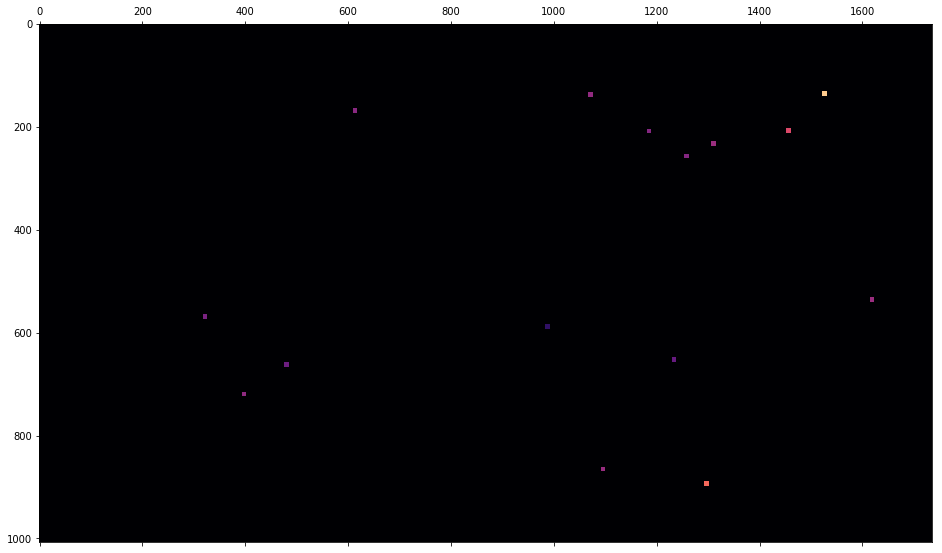

31 782184 /work/gorkhover/zimmf/crystal/31-782184-190719-135739.npz
loaded
recon done
filter done


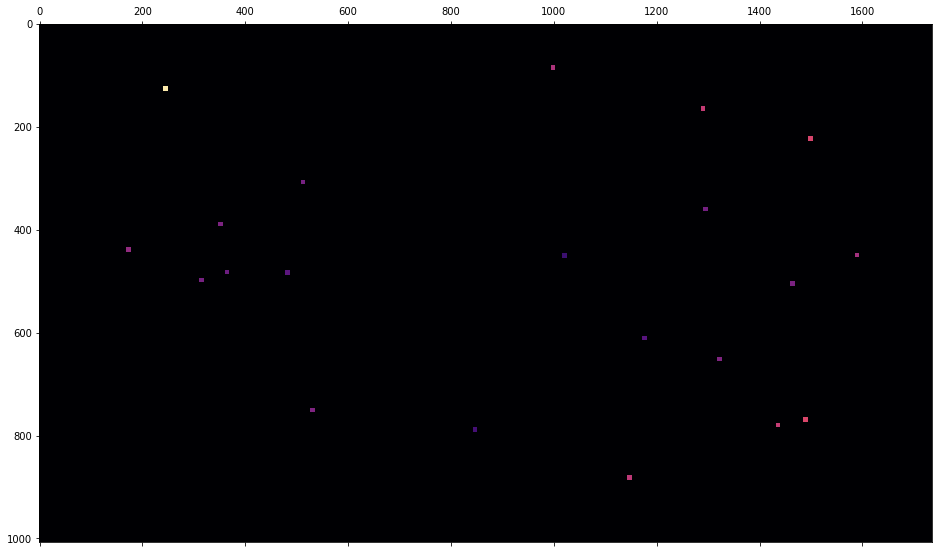

31 782185 /work/gorkhover/zimmf/crystal/31-782185-190719-140916.npz
loaded
recon done


In [ ]:
runstart=int((r['Run start'][0]))
runend=int(r['last run'][0])
run=str(r.name)

for cr in range(runstart+1,runend-1):
    filename=getlatest(path,f'{run}-{cr}-*',n=1)
    if filename is None: 
        print(r.name,cr,filename,'not found')
        continue
    print(r.name,cr,filename)
    file=np.load(filename)
    data=file['ft3d_mean']
    mask=file['mask']
    z=(file['z']*0.01)/(file['pixelsize']*1e-6)
    print('loaded')
    
    norm=recon.ft.corr(mask,z)
    norm=recon.ft.unwrap(norm)
    res=recon.ft.unwrap(data)
    np.divide(res,norm,out=res)
    res[norm<1e3]=0
    print('recon done')
    
    cand=util.fftfilter_std(res,size=30,sigma=5)
    cleancand=np.copy(cand)
    cleancand[res<0]=False
    border=ndi.morphology.binary_dilation(norm<1e8,np.ones((3,3,3)),2)
    bordercand=np.copy(cand)
    bordercand=ndi.morphology.binary_dilation(bordercand,np.ones((9,3,3)),3)
    bordercand=ndi.morphology.binary_opening(bordercand,np.ones((1,3,3)),4)
    cleancand[border]=False
    cleancand[bordercand]=False
    print('filter done')
    
    tmp=np.nanmax(res[:40]*cleancand[:40],axis=0)
    tmp[tmp>0.005]=0
    plt.matshow(ss.fftconvolve(tmp,np.ones((9,9))),vmin=0,vmax=0.005,cmap=plt.cm.magma)
    plt.show()

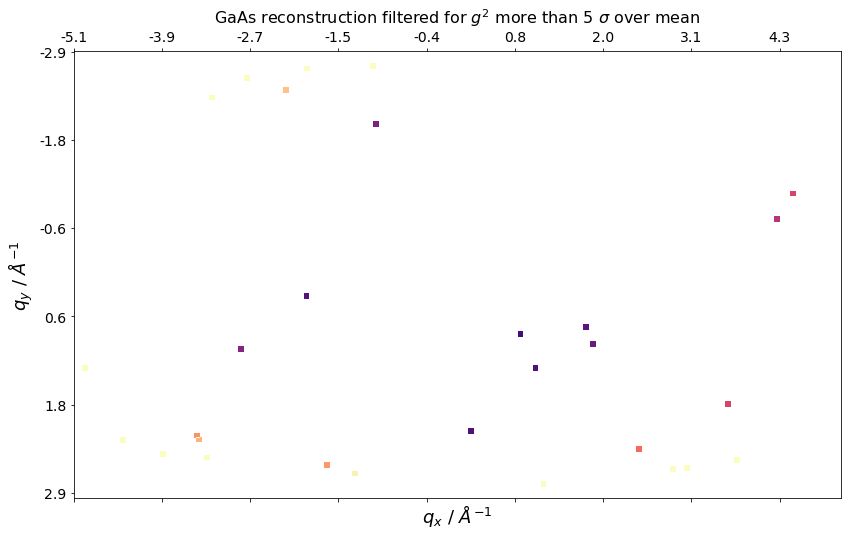

In [97]:
plt.rcParams['figure.figsize']=(8,8)
tmp=np.nanmax(res[:40]*cleancand[:40],axis=0) #maxima up to qz=40 pixel

#convolve so peaks are easier to see
tmp=ss.fftconvolve(tmp,np.ones((13,13)))
tmp[tmp20.001]=np.nan
plt.matshow(tmp,vmin=0,vmax=0.005,cmap=plt.cm.magma)
ax=plt.gca()

E=9250
dq=(1./z)*(2*np.pi/(12398./E))
xt=np.round((ax.get_xticks()-tmp.shape[1]//2)*dq,1)
yt=np.round((ax.get_yticks()-tmp.shape[0]//2)*dq,1)
ax.set_xticklabels(xt,fontsize=14)
ax.set_yticklabels(yt,fontsize=14)
plt.title('GaAs reconstruction filtered for $g^2$ more than 5 $\sigma$ over mean',fontsize=16)
plt.xlabel('$q_x$ / $\AA ^{-1}$',fontsize=18)
plt.ylabel('$q_y$ / $\AA ^{-1}$',fontsize=18)

In [80]:
maxdim=cand.shape
center=np.array((0,.5,.5))*maxdim
zmax=100
zs,xs,ys=np.where(cleancand[:zmax,...])
cs=res[zs,xs,ys]
dq=(1./z)*(2*np.pi/(12398./E))
zs,xs,ys=((zs,xs,ys)-center[:,None])*dq
cs=np.concatenate((cs,cs))
xs=np.concatenate((xs,-xs))
ys=np.concatenate((ys,-ys))
zs=np.concatenate((zs,-zs))
maxhit=np.max((xs,ys,zs))

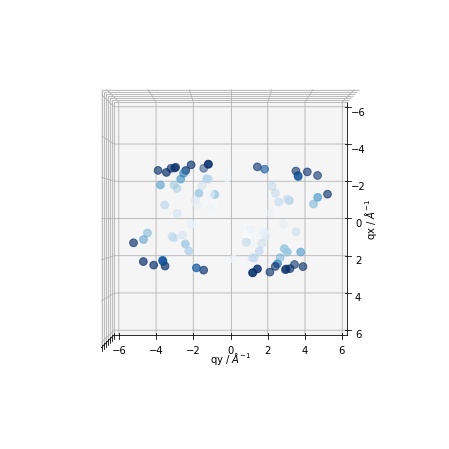

In [109]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.set_zlim(-6,6)

sc=ax.scatter(xs, ys, zs,c=cs,s=60,cmap=plt.cm.Blues,norm=matplotlib.colors.Normalize(vmin=np.min(cs), vmax=np.percentile(cs,70), clip=True))
ax.set_xlabel('qx / $\AA^{-1}$')
ax.set_ylabel('qy / $\AA^{-1}$')

ax.zaxis.set_ticklabels([])
ax.set_aspect('equal')
ax.view_init(90,0)
#plt.colorbar(sc)

plt.savefig('3d.png')
plt.show()

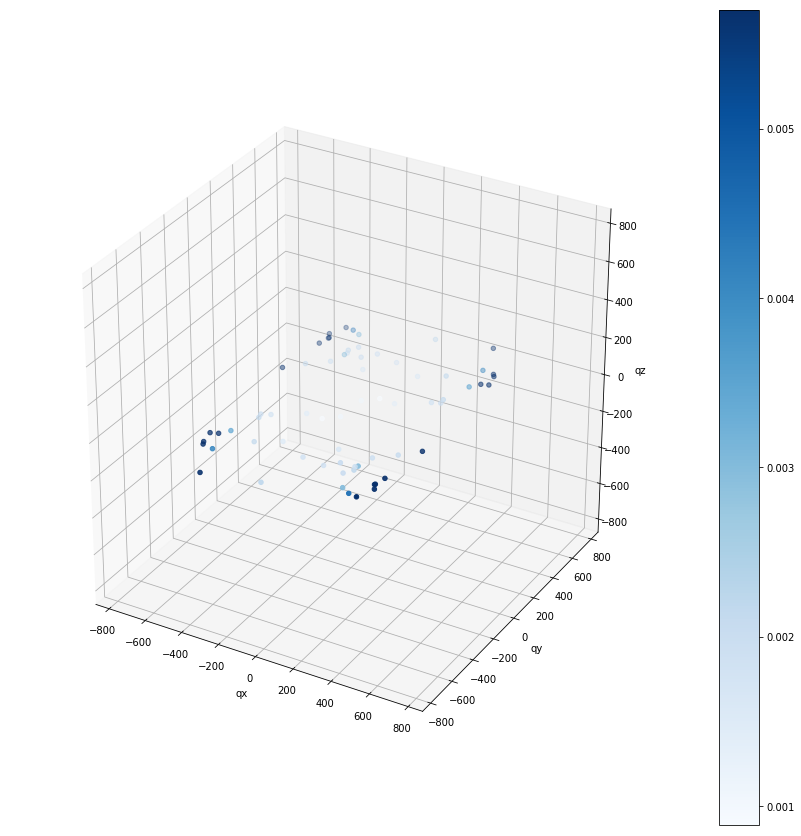

In [75]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-maxhit,maxhit)
ax.set_ylim(-maxhit,maxhit)
ax.set_zlim(-maxhit,maxhit)

sc=ax.scatter(xs, ys, zs,c=cs,cmap=plt.cm.Blues,norm=matplotlib.colors.Normalize(vmin=np.min(cs), vmax=np.percentile(cs,70), clip=True))
ax.set_xlabel('qx')
ax.set_ylabel('qy')
ax.set_zlabel('qz')
ax.set_aspect('equal')
#ax.view_init(45,0)
plt.colorbar(sc)
plt.show()